### Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

reviews = pd.read_csv('./Airbnb Seattle Listings/reviews.csv',dtype={'zipcode':object})
calendar = pd.read_csv('./Airbnb Seattle Listings/calendar.csv',dtype={'zipcode':object})
listings = pd.read_csv('./Airbnb Seattle Listings/listings.csv',dtype={'zipcode':object})
prop_assessments = pd.read_csv('./Airbnb Seattle Listings/house_price.csv', dtype={'zipcode':object})
house_rents = pd.read_csv('./Airbnb Seattle Listings/rent.csv', encoding='latin-1', dtype={'id':object,'State_Code':object,'State_Name':object,'State_ab':object,'County':object,'City':object,'Place':object,'Type':object,'Primary':object,'Zip_Code':object,'Area_Code':object,'ALand':object,'AWater':object,'Lat':object, 'Lon':object, 'Mean':int, 'Median':int, 'Stdev':int,'Samples':int})

### Homogenize attributes

In [3]:
# Price string to float
listings.monthly_price = listings.monthly_price.replace('[\$,]', '', regex=True).astype(float)
listings.weekly_price = listings.weekly_price.replace('[\$,]', '', regex=True).astype(float)
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)

# remove entries with corrupt zipcode
listings = listings[listings.zipcode != "99\n98122"]

# rename attribute to match other dataframes
listings = listings.rename(columns={'id': 'listing_id'})
house_rents = house_rents.rename(columns={'Zip_Code': 'zipcode'})

# index dataframes by listing_id
calendar = calendar.set_index('listing_id')
listings = listings.set_index('listing_id')
reviews = reviews.set_index('listing_id')

### Preview Data

In [4]:
listings.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
listing_id,,,,,,,,,,,,,,,,,,,,,
241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
house_rents.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,zipcode,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,Samples
0,0101901,01,Alabama,AL,Chambers County,Wadley,Abanda,CDP,place,36276,256,7764034,34284,33.091627,-85.527029,972,968,51,12
1,0101904,01,Alabama,AL,Winston County,Addison,Addison,Town,place,35540,256,9753292,83417,34.202681,-87.178004,519,460,275,64
2,0101907,01,Alabama,AL,Marshall County,Albertville,Albertville city,City,place,35950,256,68731806,258708,34.26313,-86.21066,625,585,234,2560
3,0101910,01,Alabama,AL,Pickens County,Aliceville,Aliceville city,City,place,35442,205,11819855,0,33.123686,-88.159364,546,438,354,574
4,0101913,01,Alabama,AL,Etowah County,Walnut Grove,Altoona,Town,place,35990,205,11193369,25442,34.039204,-86.305697,350,303,185,114


In [6]:
prop_assessments.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Create dataframe with useful data

In [70]:
# total_sq_ft = len(listings.square_feet)
# nan_sq_ft = total_sq_ft - listings.square_feet.count()
# print('\nsquare_feet attribute is vastly Nan, not very useful')
# print('Total square_feet entries: {}, Total square_feet NaN: {}'.format(total_sq_ft, nan_sq_ft))

# review_scores_location would've been a great attribute to quantify the price elevation of well situated listings
# but unfortunately the value changes very little with respect to any attribute.
# this is shown in the graphs further below

# build a clean dataframe from the relevant attributes of other dataframes
data = listings[['price', 'review_scores_location', 'monthly_price', 'weekly_price', 'square_feet', 'property_type', 'bedrooms','bathrooms','accommodates', 'zipcode', 'host_neighbourhood']]
# CROSS VALIDATE BY COMPARING ON MEAN RENT
data = pd.merge(data, house_rents[['zipcode','Median', 'Mean', 'Stdev']], how='left', on=['zipcode'])
data = pd.merge(data, prop_assessments[['zipcode','bedrooms', 'bathrooms', 'price']], how='inner', on=['zipcode','bedrooms','bathrooms'])

# drop outlier points
#data = data.join(data.groupby('zipcode')['price_x'].std(), on='zipcode', rsuffix='_average_per_zip')
# NEGLIGABLE EFFECT => no real outliers
#data = data.drop(data.index[np.abs(data.price_x - data.price_x_average_per_zip) > 3 * data.price_x_average_per_zip])

# average house price by bathrooms, bedrooms, zipcode
data = data.join(data.groupby(['zipcode','bedrooms', 'bathrooms']).price_y.mean(), on=['zipcode','bedrooms', 'bathrooms'], rsuffix='_avg')

print(len(data))
print('\nSanitized Data:')
data.head()

117450

Sanitized Data:


,price_x,review_scores_location,monthly_price,weekly_price,square_feet,property_type,bedrooms,bathrooms,accommodates,zipcode,host_neighbourhood,Median,Mean,Stdev,price_y,price_x_average_per_zip,price_y_avg
0,450.0,9.0,NaN,NaN,NaN,House,3,2.0,6,98119,Queen Anne,1080.0,1233.0,337.0,716000.0,146.303847,758533.0
1,450.0,9.0,NaN,NaN,NaN,House,3,2.0,6,98119,Queen Anne,1080.0,1233.0,337.0,750000.0,146.303847,758533.0
2,450.0,9.0,NaN,NaN,NaN,House,3,2.0,6,98119,Queen Anne,1080.0,1233.0,337.0,808250.0,146.303847,758533.0
3,450.0,9.0,NaN,NaN,NaN,House,3,2.0,6,98119,Queen Anne,1080.0,1233.0,337.0,840500.0,146.303847,758533.0
4,450.0,9.0,NaN,NaN,NaN,House,3,2.0,6,98119,Queen Anne,1080.0,1233.0,337.0,677915.0,146.303847,758533.0


### Group by neighbourhood

In [23]:
by_neighbourhood = data.groupby(['host_neighbourhood'])

hoods = data.host_neighbourhood.dropna().unique()

h_prices = by_neighbourhood.price_x.mean()
h_loc_reviews = by_neighbourhood.review_scores_location.mean()

h_prices.head()


host_neighbourhood
Alki             194.876364
Anaheim          219.000000
Arbor Heights    200.000000
Atlantic         134.825674
Ballard          122.670305
Name: price_x, dtype: float64

### Grouping by Zipcode

In [24]:
by_zip = data.groupby(['zipcode'])

zips = data.zipcode.dropna().unique()

z_prices = by_zip.price_x.mean()
z_loc_reviews = by_zip.review_scores_location.mean()

z_prices.head()

zipcode
98102    182.014388
98103    142.020342
98105    161.085561
98106     90.805933
98107    149.811361
Name: price_x, dtype: float64


### Plot Both Groupings

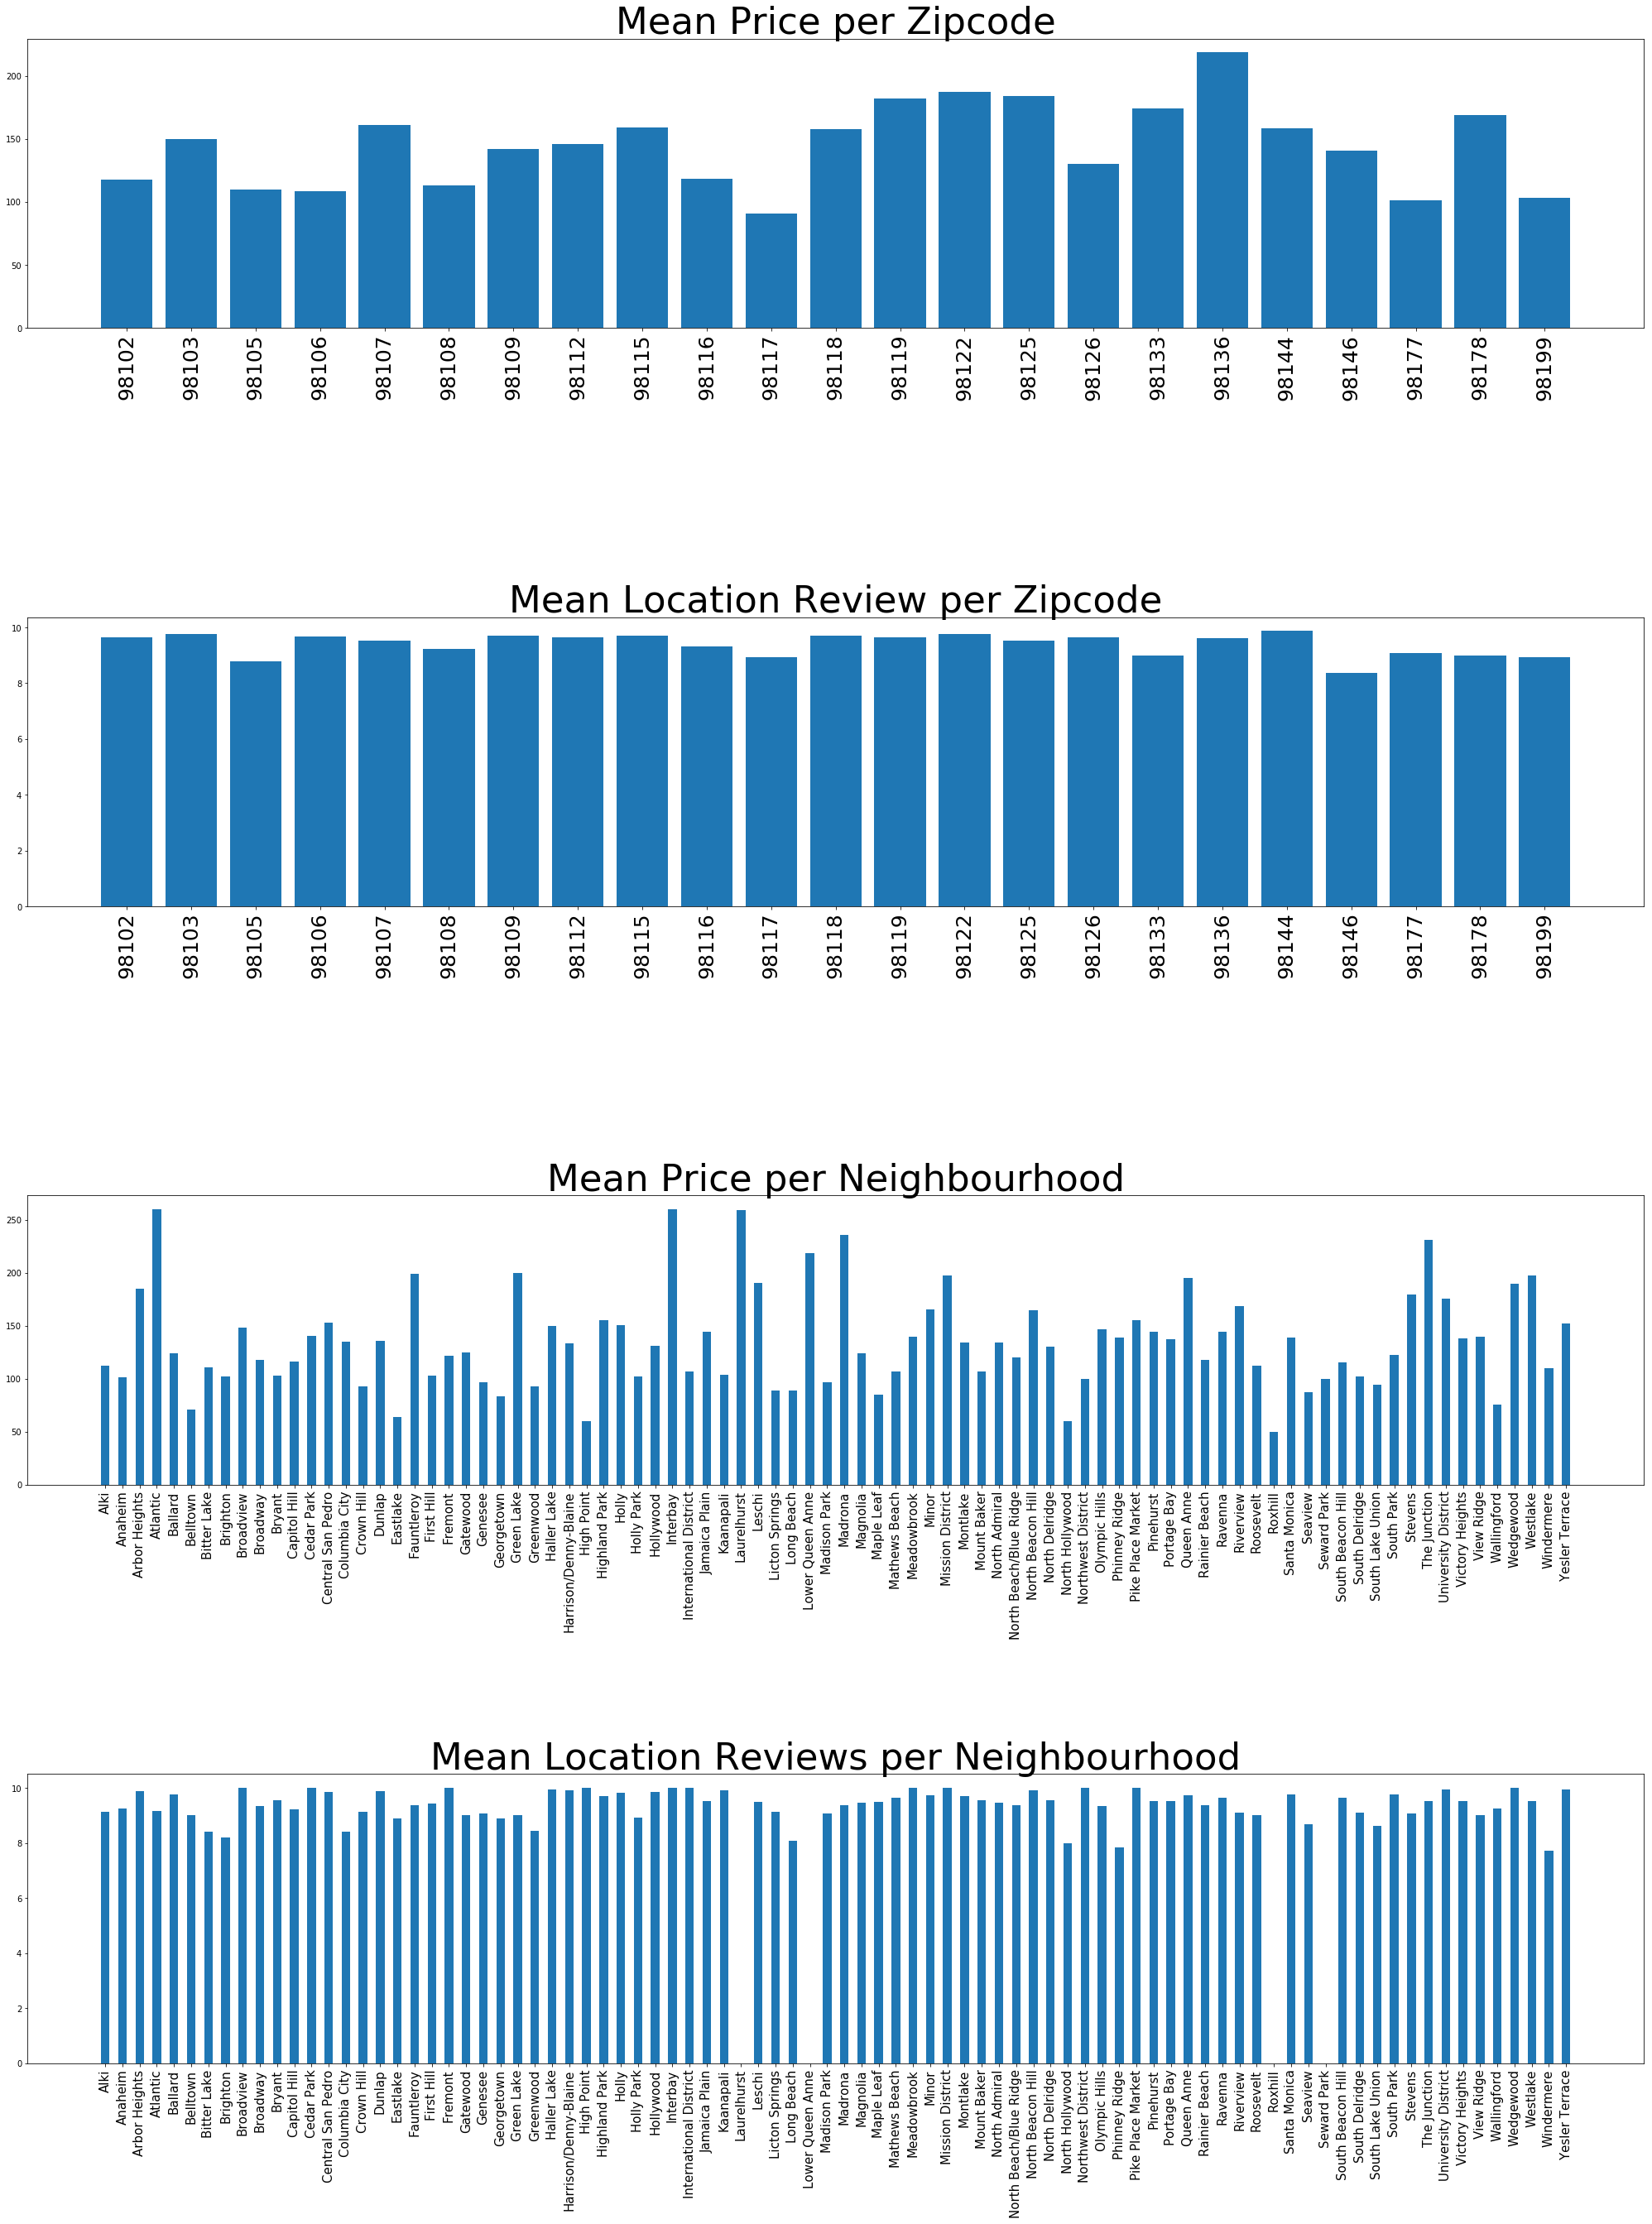

In [25]:
fig, xarr = plt.subplots(4,1, figsize=(35,45))
fig.subplots_adjust(hspace=1)
  
xarr[0].bar(zips, z_prices)
xarr[0].set_title('Mean Price per Zipcode')

xarr[1].bar(zips, z_loc_reviews)
xarr[1].set_title('Mean Location Review per Zipcode')

xarr[2].bar(hoods, h_prices, width=0.5)
xarr[2].set_title('Mean Price per Neighbourhood');

xarr[3].bar(hoods, h_loc_reviews, width=0.5)
xarr[3].set_title('Mean Location Reviews per Neighbourhood');

for i in range(4):
    plt.sca(xarr[i])
    xarr[i].title.set_size(45)
    fontsize = 25 if i < 2 else 15
    plt.xticks(rotation='vertical', fontsize=fontsize)


### Mean price per neighbourhood per amount of rooms

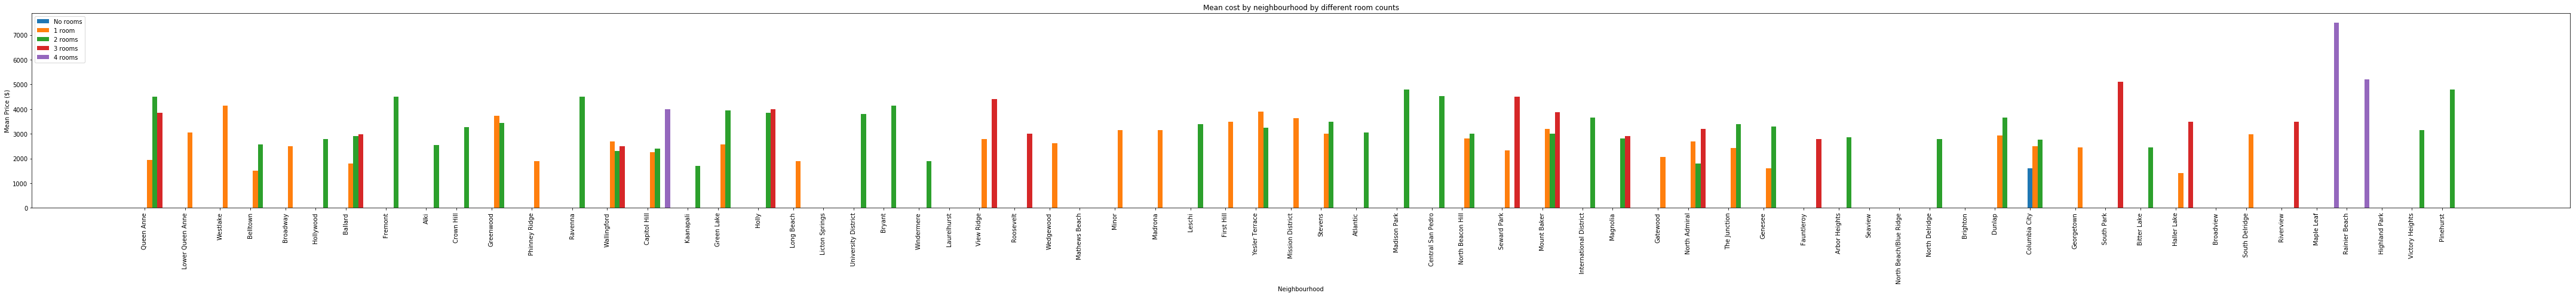

In [35]:
import random
import math

plt.close()
frig, ax = plt.subplots(figsize=(60,7))
frig.subplots_adjust(hspace=10)
width = 0.4
padding = 5

by_hood = data.groupby('host_neighbourhood')
#hoods = data.host_neighbourhood.dropna().unique()

fewhosts = data.host_neighbourhood.dropna().unique()[:]
subdata = data[data['host_neighbourhood'].isin(fewhosts)]

roomconfigs = {}
for i in subdata.host_neighbourhood.dropna().unique():
    roomconfigs[i] = len(subdata[subdata['host_neighbourhood'] == i].bedrooms.dropna().unique())
    
#print(roomconfigs)
    
starts = {}
pads = {}
cur = 0
p = 0
for i in subdata.host_neighbourhood.dropna().unique():
    starts[i] = cur * width
    pads[i] = p
    p = p + padding * width
    cur = cur + roomconfigs[i]
    
rooms = subdata.sort_values('bedrooms').bedrooms.dropna().unique()
r = 0
for i in rooms:
    by_hood = subdata[subdata['bedrooms'] == i].groupby('host_neighbourhood')
    hoods = subdata[subdata['bedrooms'] == i].host_neighbourhood.dropna().unique()
    prices = by_hood.monthly_price.mean()
    pos = [r*width + starts[x] + pads[x] for x in hoods]
    r = r + 1
        
    plt.bar(pos, prices, width)

ax.set_xticks([starts[x] + pads[x] for x in subdata.host_neighbourhood.dropna().unique()])
ax.set_xticklabels(subdata.host_neighbourhood.dropna().unique())
plt.xticks(rotation='vertical')
plt.legend(["No rooms", "1 room"] + [str(x) + " rooms" for x in range(2,len(rooms))], loc='upper left')
plt.title("Mean cost by neighbourhood by different room counts")
plt.xlabel("Neighbourhood")
plt.ylabel("Mean Price ($)")
plt.tight_layout()

### Fit Data


In [71]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#TODO TEST WITH DIFFERENT RATIOS TRAIN/TEST
X_train, X_test, y_train, y_test = train_test_split(data[['price_x','bedrooms','bathrooms','zipcode']], data['price_y_avg'], random_state=0)
# normalize price_x to be equivalent in weight to bathrooms and bedrooms attributes
# FIND WAY TO NORMALIZE ONLY THE price_x attribute
# X_train_scaled = preprocessing.scale(X_train)
# X_test_scaled = preprocessing.scale(X_test)

0.390677399366
0.390205154948
0.389825815984
0.389308447438
0.388719132266
0.388182958557
0.387588302518
0.386679697534
0.385913485724
0.390677399366
[ 512574.75]


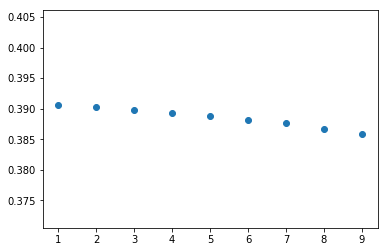

In [72]:
from sklearn.neighbors import KNeighborsRegressor

real_y_idx = y_test.index.values
real_y = data.price_y.loc[real_y_idx]

ns = []
for i in range(1, 10):
    reg = KNeighborsRegressor(n_neighbors=i)
    reg.fit(X_train, y_train)
    ns.append(reg.score(X_test,real_y))
    print(ns[i-1])

plt.scatter(range(1,10),ns)
    
mx=max(ns)
print(mx)
reg = KNeighborsRegressor(n_neighbors=ns.index(mx)+1)
reg.fit(X_train,y_train)
# TODO PREDICT WTIH MORE VARIANTS 
print(reg.predict([[80,3,1.5,98103]]))
    

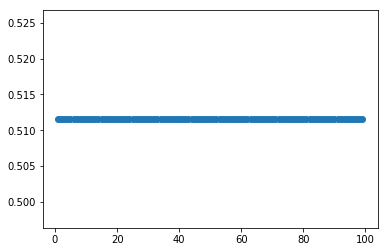

In [64]:
from sklearn import linear_model
x = range(1,100)
ns = []
for i in x:
    reg =linear_model.Ridge(alpha = i)
    reg.fit(X_train,y_train)
    ns.append(reg.score(X_test,y_test))
  
plt.scatter(x,ns)

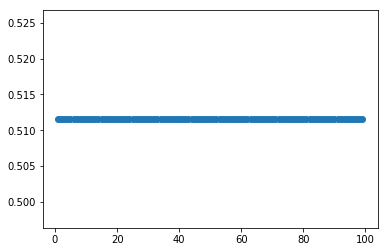

In [65]:
from sklearn import linear_model
x = range(1,100)
ns = []
for i in x:
    reg =linear_model.Lasso(alpha = i)
    reg.fit(X_train,y_train)
    ns.append(reg.score(X_test,y_test))

    
plt.scatter(x,ns)

In [66]:
data[data['zipcode'] == '98103']

,price_x,review_scores_location,monthly_price,weekly_price,square_feet,property_type,bedrooms,bathrooms,accommodates,zipcode,host_neighbourhood,Median,Mean,Stdev,price_y,price_x_average_per_zip,price_y_avg
19647,79.0,10.0,3500.0,1300.0,NaN,House,3,1.5,6,98103,Green Lake,1555.0,1595.0,689.0,440000.0,151.741795,5.125748e+05
19648,79.0,10.0,3500.0,1300.0,NaN,House,3,1.5,6,98103,Green Lake,1555.0,1595.0,689.0,702500.0,151.741795,5.125748e+05
19649,79.0,10.0,3500.0,1300.0,NaN,House,3,1.5,6,98103,Green Lake,1555.0,1595.0,689.0,625000.0,151.741795,5.125748e+05
19650,79.0,10.0,3500.0,1300.0,NaN,House,3,1.5,6,98103,Green Lake,1555.0,1595.0,689.0,870000.0,151.741795,5.125748e+05
19651,79.0,10.0,3500.0,1300.0,NaN,House,3,1.5,6,98103,Green Lake,1555.0,1595.0,689.0,588000.0,151.741795,5.125748e+05
19652,79.0,10.0,3500.0,1300.0,NaN,House,3,1.5,6,98103,Green Lake,1555.0,1595.0,689.0,371000.0,151.741795,5.125748e+05
19653,79.0,10.0,3500.0,1300.0,NaN,House,3,1.5,6,98103,Green Lake,1555.0,1595.0,689.0,857500.0,151.741795,5.125748e+05
19654,79.0,10.0,3500.0,1300.0,NaN,House,3,1.5,6,98103,Green Lake,1555.0,1595.0,689.0,415000.0,151.741795,5.125748e+05
19655,79.0,10.0,3500.0,1300.0,NaN,House,3,1.5,6,98103,Green Lake,1555.0,1595.0,689.0,360000.0,151.741795,5.125748e+05
19656,79.0,10.0,3500.0,1300.0,NaN,House,3,1.5,6,98103,Green Lake,1555.0,1595.0,689.0,608000.0,151.741795,5.125748e+05
